# MULTIPLE LINEAR REGRESSION
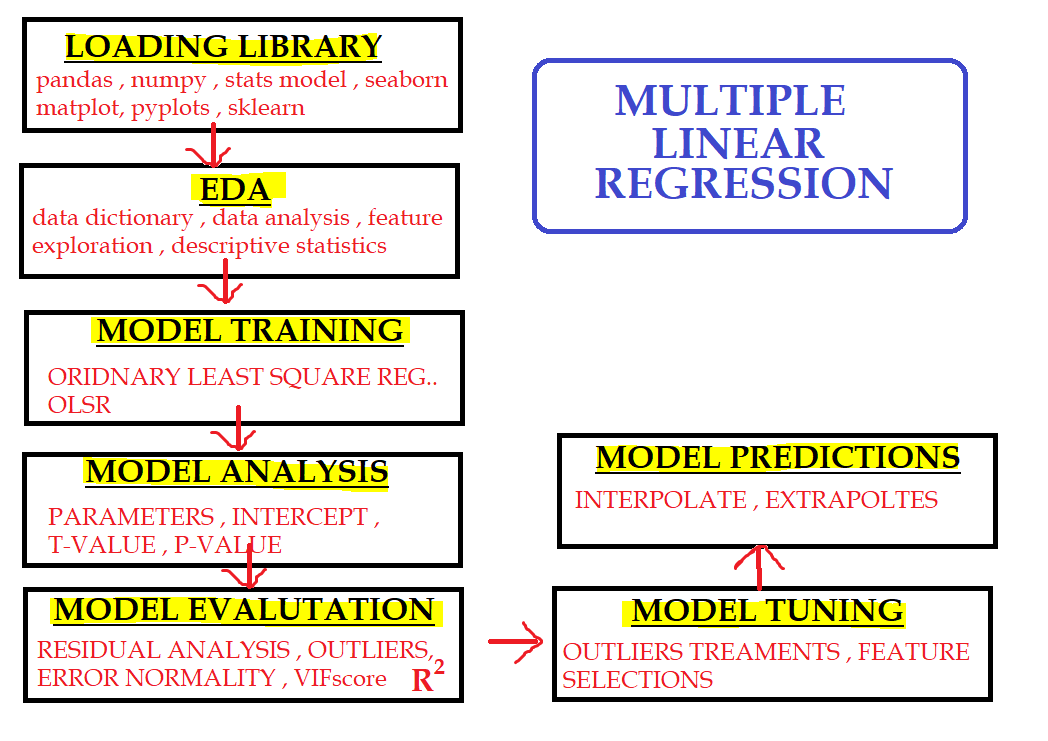

# CASE STUDY 1 : Price prediction model for Toyota Corolla

In [2]:
#LOADING LIBRARIES 1 (DATA LOADING , EDA , ANALYSIS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#LOADING LIBRARIES 2 (STATISTICAL LIBRARIES)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
from google.colab import files
file=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [5]:
#LOADING DATA SET
data=pd.read_csv("50_Startups.csv",encoding='latin1')

EDA
------------
- DESCRIPTIVE STATS
- FEATURE EXPLORATION
- CORRELATION ANALYSIS
- NORMALITY TEST
- SCALING

In [6]:
#DATA OVERVIEW
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
print('total features = ', len(data.columns))
data.columns

total features =  5


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

FEATURES EXPLORATION
--------------
- INDEPENDENT VARIABLE - 'R&D Spend', 'Administration', 'Marketing Spend', 'State',

- TARGET VARIABLE - 'Profit'

In [8]:
#DATA SET EXPLOARTION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
#renaming
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
data1.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

FEATURES SELECTIONS
--------------
- INDEPENDENT VARIABLE -'RDS', 'ADMS', 'MKTS', 'State',
- TARGET VARIABLE -  'Profit'

In [12]:
#CHECK FOR NULL AND DUPLICATES
data1[data1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [13]:
#STATISTICAL ANLAYSIS
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


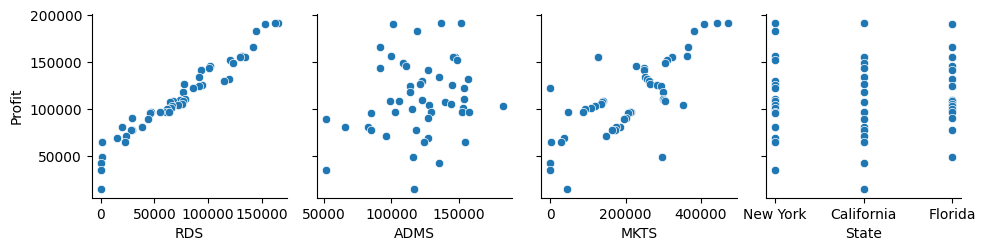

In [14]:
#CORREALTION ANALYSIS BETWEEN TARGET AND INDEPENDENT VARIABLE
sns.pairplot(x_vars=['RDS', 'ADMS', 'MKTS', 'State'],y_vars=['Profit'],data=data1)

<ipython-input-15-58ccb056b513>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),cmap='RdYlGn')


<Axes: >

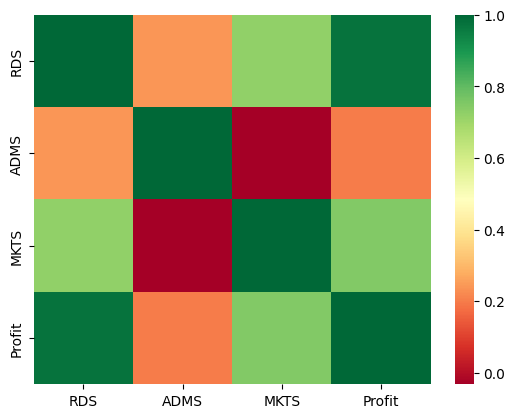

In [15]:
#DRAWING HEATMAP FOR CORRELATION
sns.heatmap(data1.corr(),cmap='RdYlGn')

In [16]:
#CORRELATION between PRICE and independent variables
data1.corr()['Profit'][1:]

<ipython-input-16-2ccb573532e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()['Profit'][1:]


ADMS      0.200717
MKTS      0.747766
Profit    1.000000
Name: Profit, dtype: float64

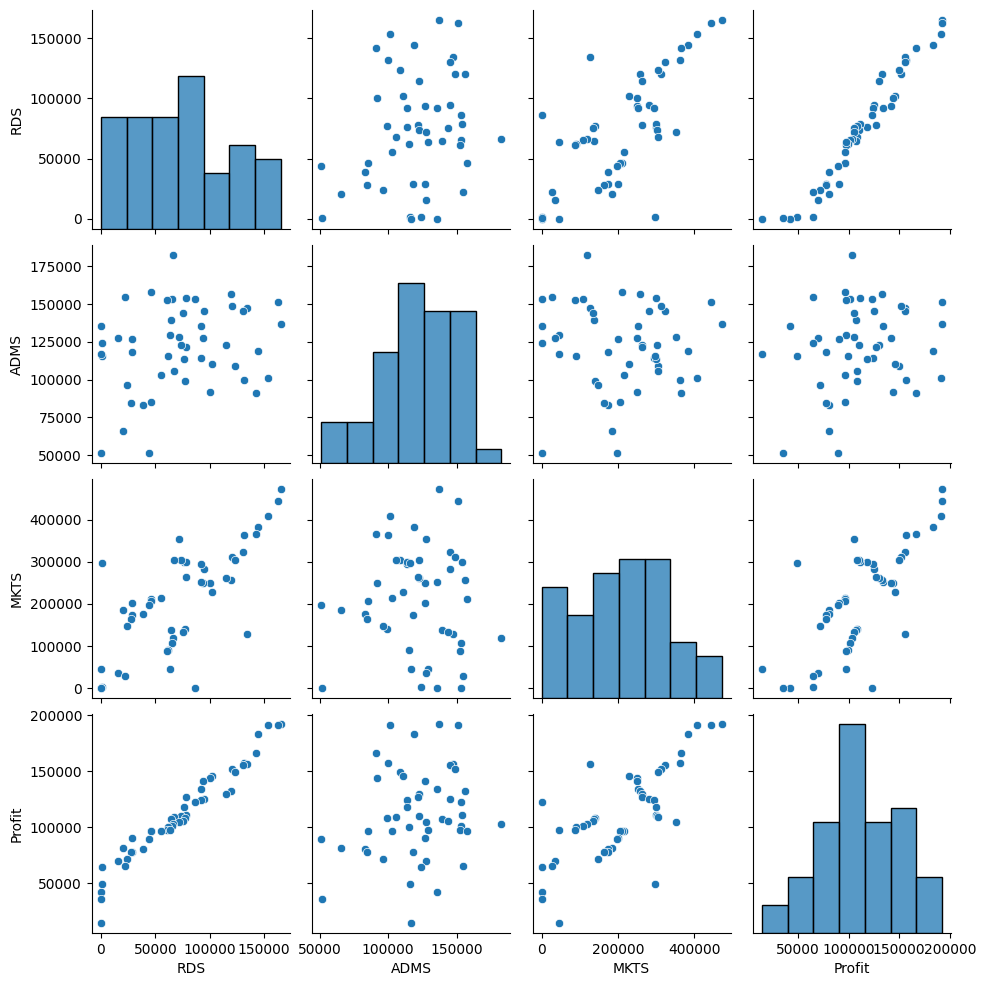

In [17]:
#Multicollinearity analysis
sns.pairplot(data1)
plt.show()

MODEL TRAINING
--------
OLS MODEL instead of LinearRegression

In [18]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

In [19]:
model

MODEL ANALYSIS
-------
- INTERCEPT
- SLOPES/BETA
- TEST STATISTIC
- P-VALUE

In [20]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [21]:
#STATISTICAL ANLYSIS OF MODEL
model.tvalues

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64

In [22]:
np.round(model.pvalues,7)

Intercept    0.000000
RDS          0.000000
ADMS         0.601755
MKTS         0.104717
dtype: float64

In [23]:
#COFF OF DETERMINATION - FITNESS TEST
model.rsquared_adj

0.9475337762901719

MODEL ANALYSIS CONCLUSION
- rsq = 0.9475
- MODEL accuracy = 94.75%
- STATISTICALLY INSIGNIFICANT = ADMS,MKTS

INSINGNIFICANT FEATURES ANALYSIS
- ADMS
- MKTS

In [24]:
#SIMPLE LINNEAR REG
modelADMS=smf.ols("Profit~ADMS",data=data1).fit()
np.round(modelADMS.pvalues,7)

Intercept    0.003824
ADMS         0.162217
dtype: float64

In [25]:
#SIMPLE LINNEAR REG
modelMKTS=smf.ols("Profit~MKTS",data=data1).fit()
modelMKTS.pvalues

Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64

In [26]:
#MULITPLE LINEAR REGRESSION
modelAM=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
modelAM.pvalues

Intercept    2.589341e-01
ADMS         1.729198e-02
MKTS         9.727245e-11
dtype: float64

Aa SLR and MLR for insignificant features ADMS ,MKTS  is significant with p<0.05

MODEL EVALUATION/VALIDATION
------
- Residual Analysis via RESIDUAL PLOT
- Collinearity Analysis
- Normality of residuals
- Outlier Analysis

In [27]:
# VIF = VARIANCE INFLUENCE FACTOR = 1/(1-rsqr)
# ANLAYSIS OF COLLINEARITY BETWEEN INDEPENDENT VARIABLES
ind_vars="RDS+ADMS+MKTS"

In [29]:
#CALCUALTING VIF

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe
d1={'Features':['RDS','ADMS','MKTS'],'VIFscore':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Features,VIFscore
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


VIF < 2.5

No Collinearity

RESIDUAL ANALSIS

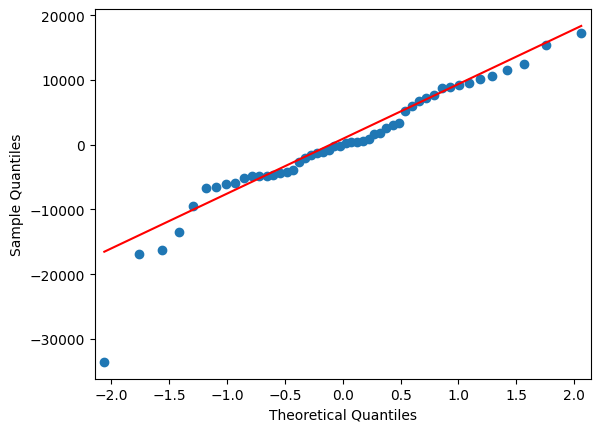

In [31]:
#NORMALITY OF RESIDUAL TEST
sm.qqplot(model.resid,line='q')
plt.show()

In [ ]:
#RESIDUAL FOLLOWES NORMALITY
#TEST FOR HOMOSCEDASTICITY

In [32]:
#STANDARDIZED FORMULA
def z(a):
  zscore = (a-a.mean())/a.std()
  return zscore

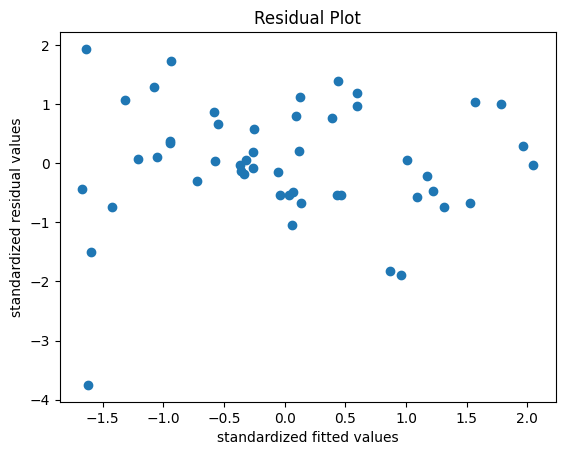

In [33]:
# RESIDUAL PLOT 1  - PREDICTED VS RESIDUAL
plt.scatter(z(model.fittedvalues),z(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


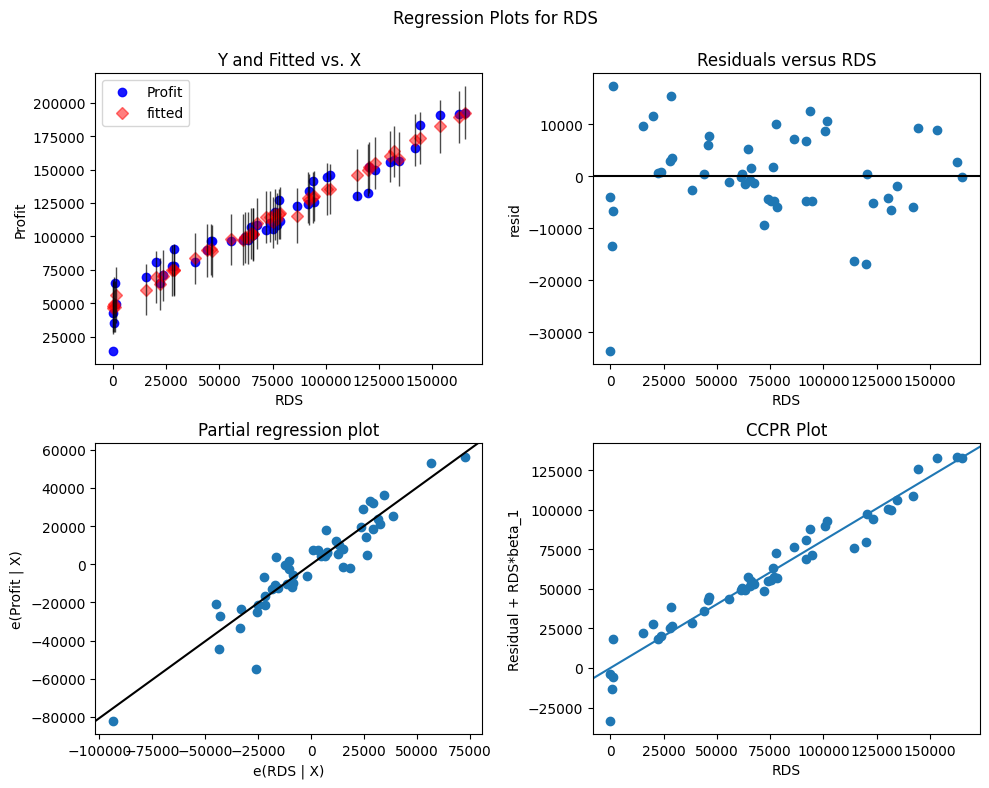

In [34]:
#RESIDUAL PLOT 2 - RDS VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


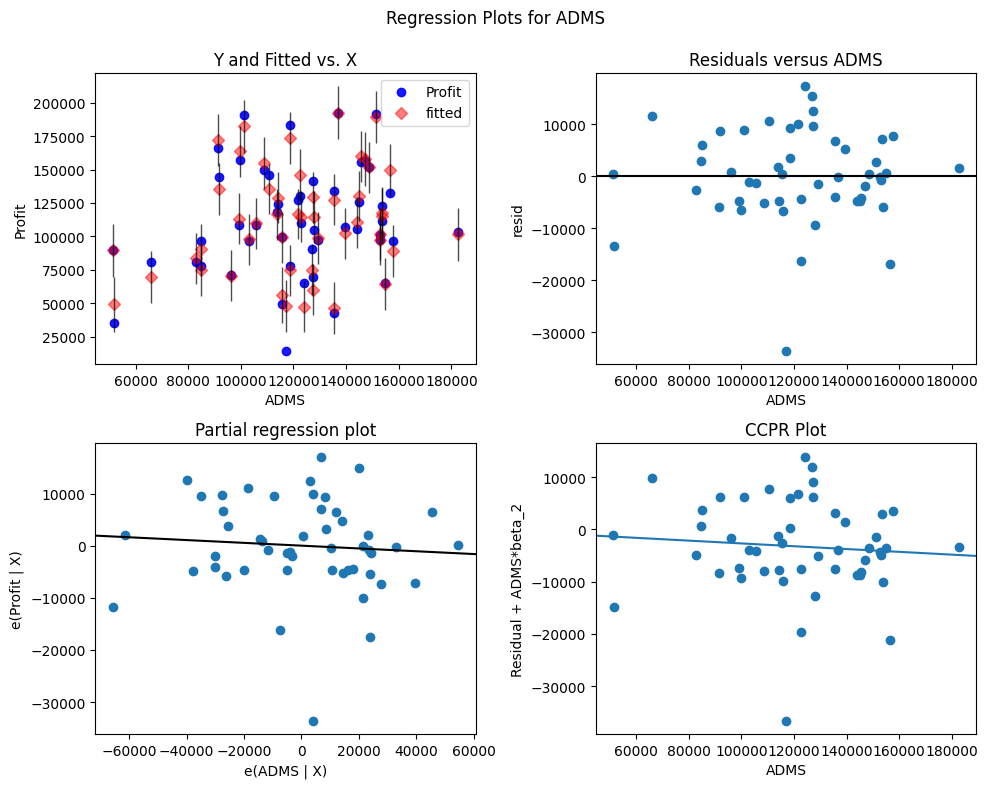

In [35]:
#RESIDUAL PLOT 3 - ADMS VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


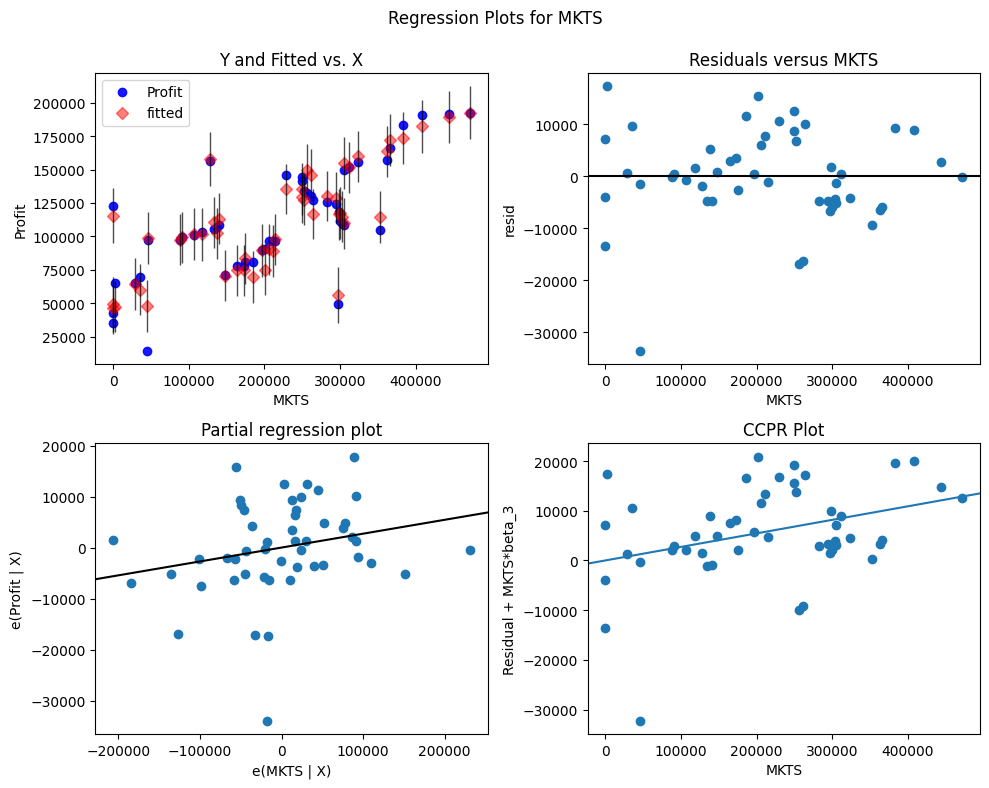

In [36]:
#RESIDUAL PLOT 2 - MKTS VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

OUTLIER ANALYSIS

- INFLUENTIAL POINT
- LEVERAGE POINT
- COOK DISTANCE

In [37]:
#COOK DISTANCE - ROW / DATA POINT HAVING MAX INFLUENCE
cdis=(model.get_influence().cooks_distance)[0]
cdis

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

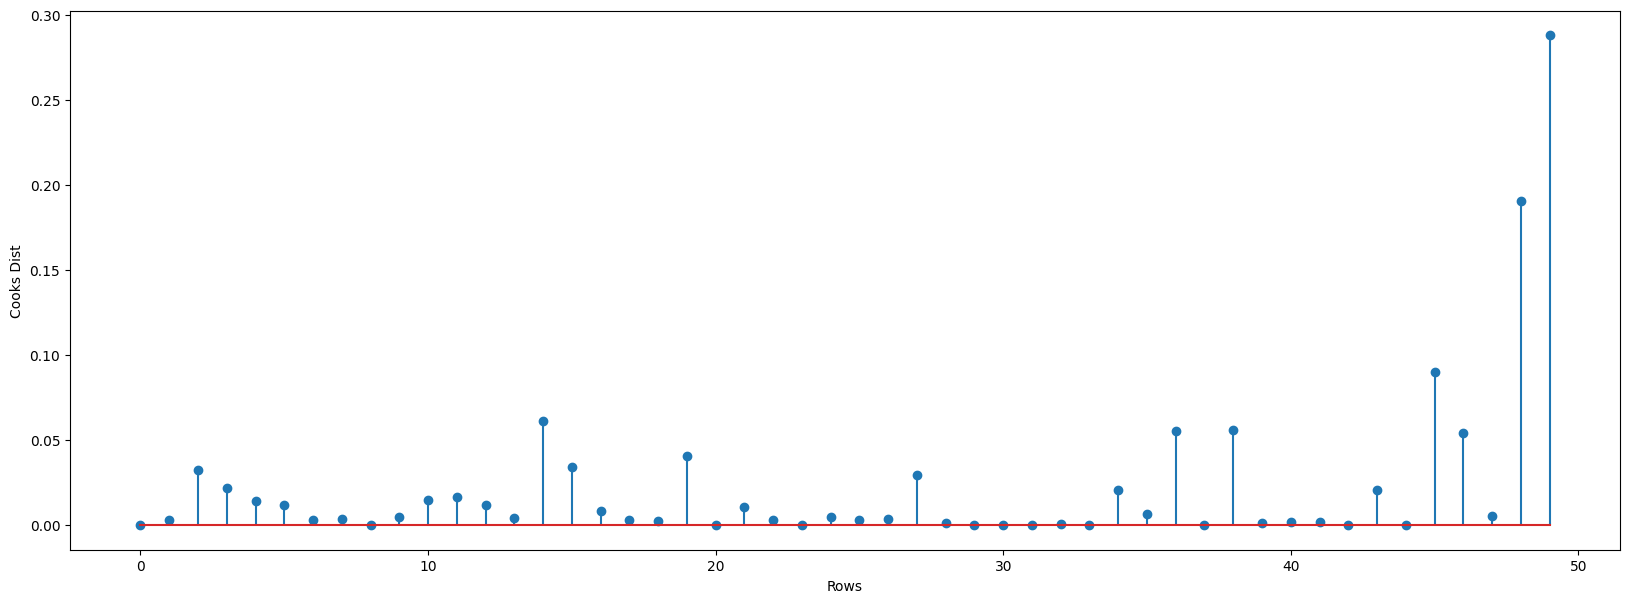

In [38]:
#PLOTING COOK DISTANCE VS ROW
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(cdis,4))
plt.xlabel('Rows')
plt.ylabel('Cooks Dist')
plt.show()

In [39]:
#max cook distance row INDEX
#argmax - returns index value
np.argmax(cdis)

49

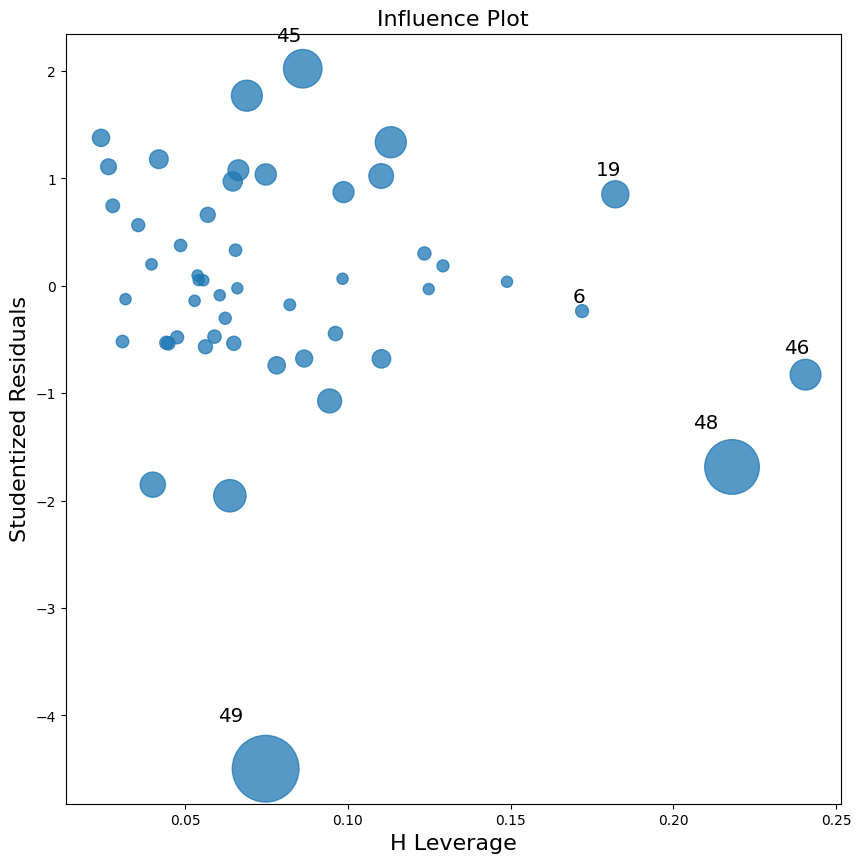

In [40]:
# ROW 49 HAVE MAX INFLUENCE
# LEVERAGE DISTANCE
#influence_plot(model)
fig,axs=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax= axs)


In [42]:
# Leverage Cuttoff Value = 3*(features+1)/observations
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

MODEL Evaluation Conslusion:

- row at index 80 have max influence
- delete and model tuning


MODEL DIAGNOSTICS
----
- OUTLIER DIGNOS
- FINAL MODEL

In [43]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)

In [44]:
data2.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
#NEW MODEL
model1=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()

In [46]:
rx=['MODEL','MODEL AFTER DIGNOS']
ry=[np.round(model.rsquared,4),np.round(model1.rsquared,4)]

<BarContainer object of 2 artists>

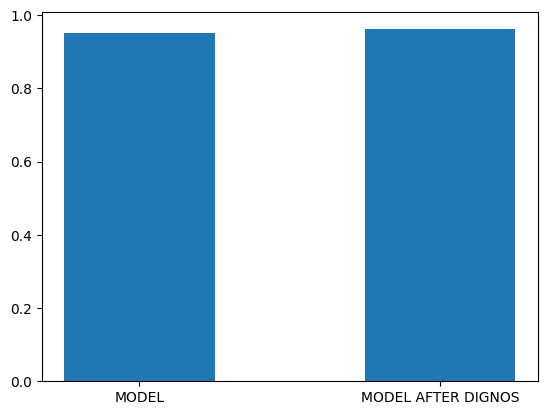

In [47]:
plt.bar(rx,ry,width=.5)

In [48]:
#ACCRUACY IMPROVDE
print('ACCURACY IMPROOVED = ',(np.round(model1.rsquared,4)-np.round(model.rsquared,4)))

ACCURACY IMPROOVED =  0.010600000000000054


FINAL MODEL

- OUTLIER DELETED
- NO MULTICOLINEAR FEATURES
- COFF OF DETERMINATION > 85% GOOD FIT


In [49]:
final_model=model1

MODEL PREDICTIONS
----


In [51]:
#SET 1
set1=pd.DataFrame({'RDS':50000,"ADMS":50000,"MKTS":100000},index=[0])
final_model.predict(set1)

0    92945.826979
dtype: float64

In [52]:
#SET 2
#actual vs predicted
set2=pd.DataFrame()
set2['ACTUAL']=data2['Profit']
set2['PREDCITION']=final_model.predict(data2[0:3])

In [54]:
set2.head(2)

,ACTUAL,PREDCITION
0,192261.83,190716.676999
1,191792.06,187537.122227


CHECK IF TRANFORMATION IMPROOVE ANALYSIS

In [58]:
data3=data2[['RDS', 'ADMS', 'MKTS','Profit']].copy()

In [59]:
data3.head()

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [62]:
log_df=np.log(data3)
square_df=np.square(data3)
sqrt_df=np.sqrt(data3)

In [64]:
'model_log=smf.ols("Profit~RDS+ADMS+MKTS",data=log_df).fit()'
model_square=smf.ols("Profit~RDS+ADMS+MKTS",data=square_df).fit()
model_sqrt=smf.ols("Profit~RDS+ADMS+MKTS",data=sqrt_df).fit()

In [66]:

df2={'Prep_Models':['Model','Final_Model','Square_Model','Sqrt_Model'],'Rsquared':[model.rsquared,final_model.rsquared,model_square.rsquared,model_sqrt.rsquared]}
rtable=pd.DataFrame(df2)
rtable

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
2,Square_Model,0.953154
3,Sqrt_Model,0.937536


<BarContainer object of 4 artists>

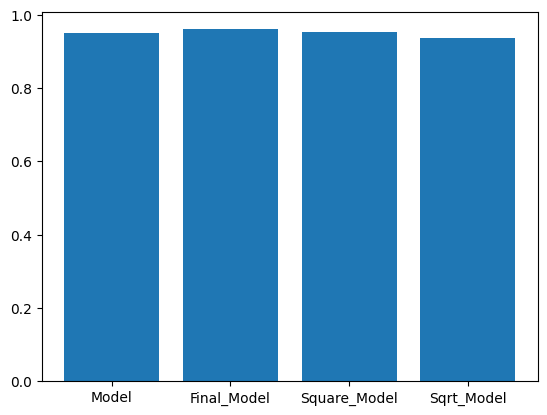

In [68]:
plt.bar(df2['Prep_Models'],df2['Rsquared'])


#CONCLUSION

- transformation not helpfull
- final model - accuracy 96% (after removing outliers)